In [8]:
import requests
import cv2
import base64
import matplotlib.pyplot as plt
from PIL import Image
import io
import numpy as np
import pprint

def show(image):
    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(image)
    plt.title("image")
    plt.axis('off')
    
class Client():
    
    def get_results(self):
        if self.successful_operation == True : 
            return self._results
        else :
            return "unable to return results"
            
    def __init__(self,adresse):
        self.adresse = adresse
        self.successful_operation = False
        self._results = None 
        
    def get(self,adresse):
        response = requests.get(self.adresse+adresse)
        if response.status_code == 200:
            self._results =  response.content
            self.successful_operation = True
            
    def post(self,adresse,request_body):
        response = requests.post(self.adresse+adresse, data=request_body)
        if response.status_code == 200:
            self._results =  response.content
            self.successful_operation = True
        else : 
            self.successful_operation = False
        return response.status_code

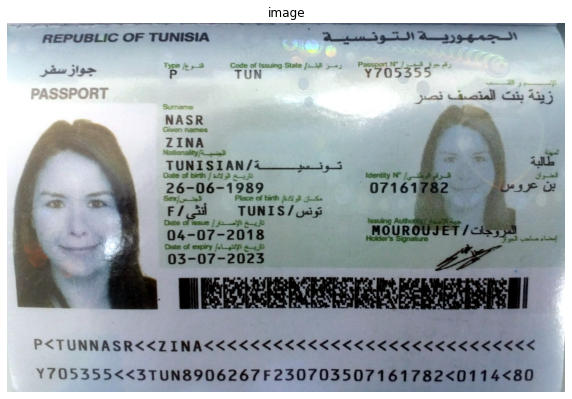

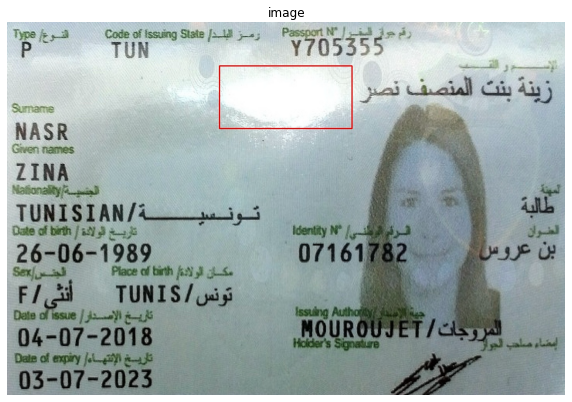

In [2]:
image1 = cv2.imread("testing2.png")
image2 = cv2.imread("testing4 (3).jpg")
image = image1
show(image)
client = Client("http://127.0.0.1:8000/api/")

img = base64.b64encode(cv2.imencode('.jpg', image)[1])

status_code = client.post("information_extraction/",{"passport" : img})
res = client.get_results()

res = res.decode("utf-8")

results = res.split("/delim/")
if len(results)>1:
    start = 1
    print(results[0])
else :
    start = 0
for i in range(start,len(results)):
    res= base64.b64decode(results[i])
    jpg_as_np = np.frombuffer(res, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    show(img)

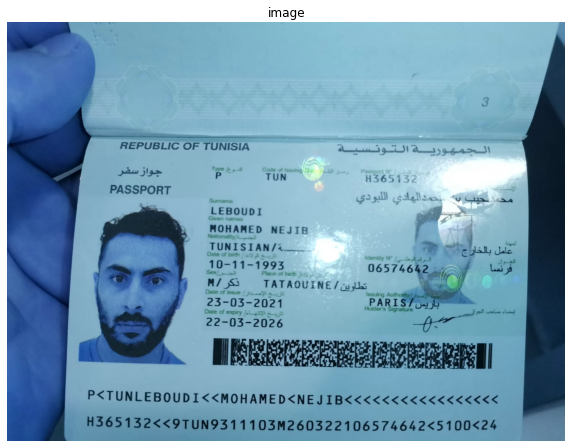

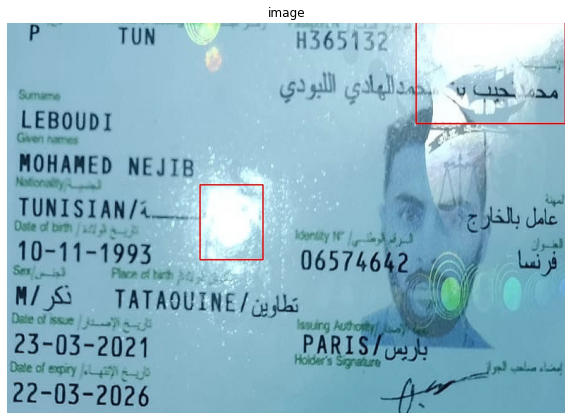

In [4]:
image1 = cv2.imread("testing2.png")
image2 = cv2.imread("testing4 (3).jpg")
image = image2
show(image)
client = Client("http://127.0.0.1:8000/api/")
img = base64.b64encode(cv2.imencode('.jpg', image)[1])
status_code = client.post("information_extraction/",{"passport" : img})
res = client.get_results()
res = res.decode("utf-8")

results = res.split("/delim/")
if len(results)>1:
    start = 1
    print(results[0])
else :
    start = 0
for i in range(start,len(results)):
    res= base64.b64decode(results[i])
    jpg_as_np = np.frombuffer(res, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    show(img)

("{'passport ID': 'A000000', 'arabic name': 'غسان بن حبيب بحروني', 'surname': "
 "'CITIZEN', 'name': 'JOHN', 'job': 'طالب', 'nationality': 'TUNISIAN/تونسي', "
 "'birth date': '00-00-0000', 'national ID': '00000000', 'adresse': "
 "'KAIRouAn7القيروان', 'sex': 'Mذكر', 'birth place': 'HAFFOUZ/حفوز', 'issue "
 "date': '00-00-0000', 'issue auth': '00-00-0000', 'expr date': '00-00-0000', "
 "'signature': 'KAIRouAn7 Jyi Dmd'}")


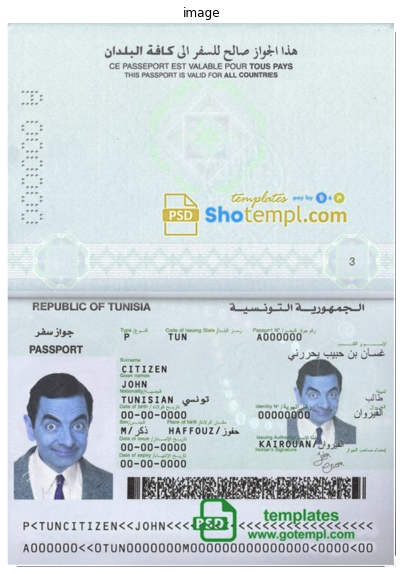

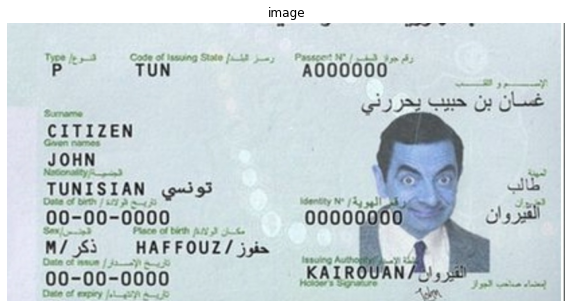

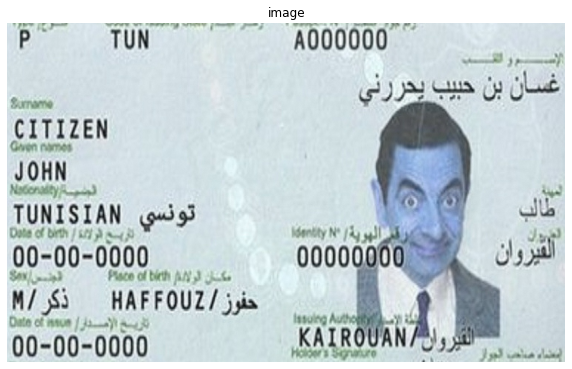

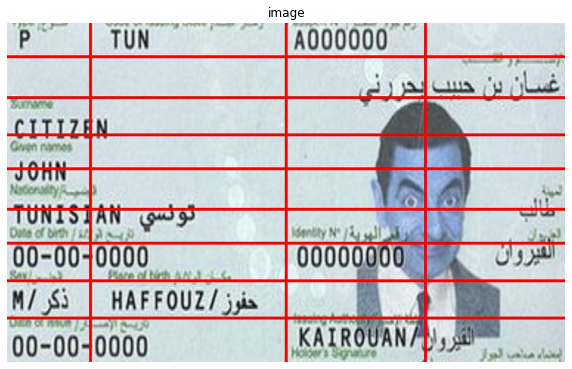

In [12]:
image = cv2.imread("test.png")
show(image)
client = Client("http://127.0.0.1:8000/api/")
pp = pprint.PrettyPrinter(indent=4)
img = base64.b64encode(cv2.imencode('.jpg', image)[1])

status_code = client.post("information_extraction/",{"passport" : img})
res = client.get_results()

res = res.decode("utf-8")

results = res.split("/delim/")
if len(results)>1:
    start = 1
    pp.pprint(results[0])
else :
    start = 0
for i in range(start,len(results)):
    res= base64.b64decode(results[i])
    jpg_as_np = np.frombuffer(res, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    show(img)